In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

# New Line Usage Evolution

In this notebook we'll take a look at how the number of riders changes on Line 3 as time passes after its opening. First load in data from the week right before opening, the week after opening, and for a month after opening (the latest that we have).

In [2]:
week_before = ['201503{}'.format(d) for d in range(25,32)]
week_after = ['2015040{}'.format(d) for d in range(1,8)]
month_after = ['201504{}'.format(d) for d in range(24,31)]

header = pd.read_csv('../nanjing-data/header.csv')

In [3]:
def reader(week):
    df = {}
    
    for date in week:
    
        # attach header
        df[date] = pd.read_csv('../nanjing-data/{}.csv'.format(date), header=None)
        df[date].columns = header.columns
        
        # drop all but station entrances
        df[date] = df[date].loc[df[date]['Entry_Or_Exit'] == 1,:]

        # drop unnecessary columns
        df[date].drop(labels=['Card_Id', 'Card_Id_Long', 'Card_Type', 'Fare', 'Device_Id', 'Entry_Or_Exit'], axis=1, inplace=True) #StationId too possibly

        # convert datetime
        df[date]['Time'] = pd.to_datetime(df[date]['Time'])
    
    return df

In [4]:
dfwb = reader(week_before)
dfwa = reader(week_after)
dfma = reader(month_after)
dfwb[week_before[0]].head()

,Time,Line_Id,StationId
0,2015-03-25 06:10:09,4,1
1,2015-03-25 07:00:17,4,1
2,2015-03-25 07:08:18,4,1
3,2015-03-25 07:11:52,4,1
4,2015-03-25 06:34:48,4,1


In [15]:
def usage_week(week, df, line3=False):
    scaler = 1e6
    
    if line3:
        # stacked bar chart with line 4 on top
        usage = {}
        usage['other'] = np.array([np.sum(df[day]['Line_Id'] != 7) for day in week])/scaler # usage not on line 3
        usage['line3'] = np.array([np.sum(df[day]['Line_Id'] == 7) for day in week])/scaler # usage on line 3

#         plt.barh(ind, usage['line3'], width)
#         plot = plt.barh(ind, usage['other'], width, left=usage['line3'])
    else:
        # regular bar chart
        usage = np.array([df[day].shape[0] for day in week])/scaler

#         plot = plt.barh(ind, usage, width)
        
    return usage

In [52]:
usage_wb = usage_week(week_before, dfwb)
usage_wa = usage_week(week_after, dfwa, line3=True)

ind = np.arange(7)
width = 0.3
open_labels = ['W','Th','F','Sa','Su','M','Tu']
reorder = [-1,-2,0,1,2,3,4] # reorder last week of april to start at wed if necessary

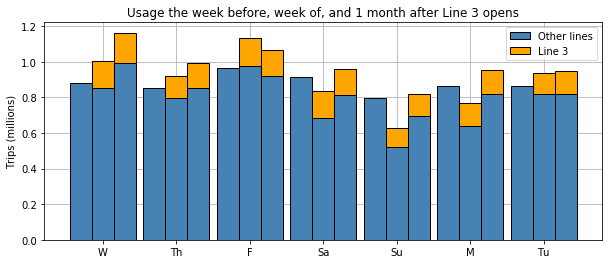

In [84]:
# all trips before, after, and 1 month after opening

plt.figure(figsize=(10,4))
ax = plt.subplot(111)

# plot bars
plt.bar(ind, usage_wb, width, edgecolor='k', color='steelblue', label='Other lines')
plt.bar(ind+width, usage_wa['other'], width, edgecolor='k', color='steelblue')
plt.bar(ind+width, usage_wa['line3'], width, edgecolor='k', color='orange', bottom=usage_wa['other'], label='Line 3')
plt.bar(ind+width*2, usage_ma['other'][reorder], width, edgecolor='k', color='steelblue')
plt.bar(ind+width*2, usage_ma['line3'][reorder], width, edgecolor='k', color='orange', bottom=usage_ma['other'][reorder])

# label the chart
plt.xticks(ind+width,open_labels)
plt.title('Usage the week before, week of, and 1 month after Line 3 opens')
plt.ylabel('Trips (millions)')

plt.legend()
# # Shrink current axis by 10%
# box = ax.get_position()
# ax.set_position([box.x0, box.y0, box.width*0.9, box.height])

# # Put a legend to the right of the current axis
# ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))

# put the grid below
ax.grid()
ax.set_axisbelow(True)

plt.savefig('figs/alltrips.png', dpi=600)
plt.show()

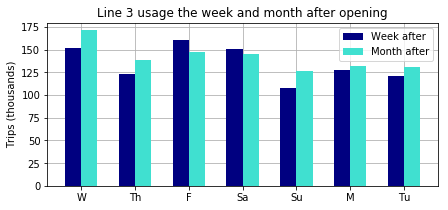

In [85]:
# only line 3 trips the week of and 1 mo after opening

plt.figure(figsize=(7,3))
ax = plt.subplot(111)
rescaler = 1000

plt.bar(ind, usage_wa['line3']*rescaler, width, label='Week after', color='navy')
plt.bar(ind+width, usage_ma['line3'][reorder]*rescaler, width, label='Month after', color='turquoise')
plt.xticks(ind+width/2, open_labels)
plt.title('Line 3 usage the week and month after opening')

plt.legend()
# # Shrink current axis by 10%
# box = ax.get_position()
# ax.set_position([box.x0, box.y0, box.width*0.9, box.height])

# # Put a legend to the right of the current axis
# ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))

ax.grid()
ax.set_axisbelow(True)

plt.ylabel('Trips (thousands)')

plt.savefig('figs/line3only.png',dpi=600)
plt.show()

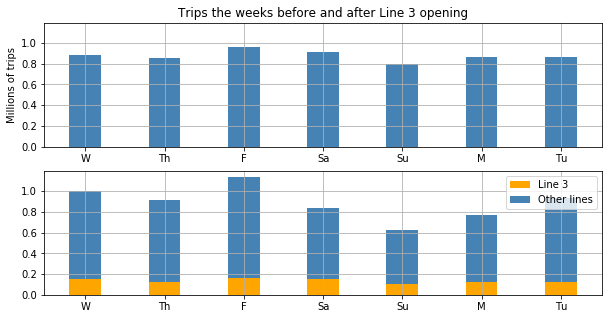

In [17]:
# week before and week of line 3 opening

plt.figure(figsize=(10,5))

ax1 = plt.subplot(211)
plt.bar(ind, usage_wb, width, color='steelblue')
plt.grid(which='major')
plt.grid(which='minor')
plt.ylabel('Millions of trips')
plt.title('Trips the weeks before and after Line 3 opening')

ax2 = plt.subplot(212, sharex=ax1, sharey=ax1)
plt.bar(ind, usage_wa['line3'], width, label='Line 3', color='orange')
plt.bar(ind, usage_wa['other'], width, bottom=usage_wa['line3'], label='Other lines', color='steelblue')
plt.xticks(ind,open_labels)
plt.legend()
plt.grid()

plt.show()

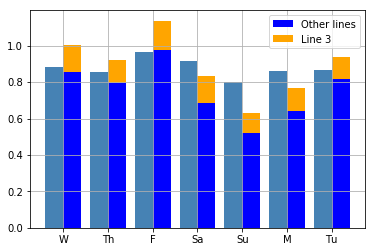

In [20]:
# last week of march vs. first week of april
plt.bar(ind, usage_wb, width, color='steelblue')
plt.bar(ind+width, usage_wa['other'], width, label='Other lines', color='blue')
plt.bar(ind+width, usage_wa['line3'], width, label='Line 3', color='orange', bottom=usage_wa['other'], )
plt.xticks(ind+width/2,open_labels)
plt.legend()
plt.grid()

plt.show()

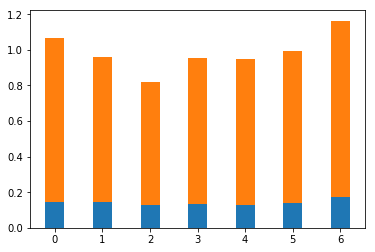

In [23]:
# last week of april

usage_ma = usage_week(month_after, dfma, line3=True)
plt.bar(ind, usage_ma['line3'], width, label='Line 3')
plt.bar(ind, usage_ma['other'], width, bottom=usage_ma['line3'], label='Other Lines')
plt.show()

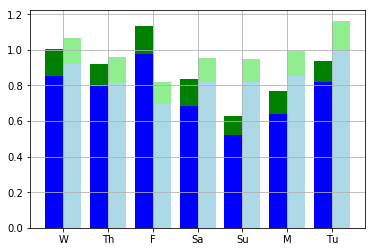

In [34]:
# week after vs. month after
plt.bar(ind, usage_wa['other'], width, label='Other lines (week after)', color='blue')
plt.bar(ind, usage_wa['line3'], width, label='Line 3 (week after)', color='green', bottom=usage_wa['other'])
plt.bar(ind+width, usage_ma['other'], width, label='Other lines (1 month after)', color='lightblue')
plt.bar(ind+width, usage_ma['line3'], width, label='Line 3 (1 month after)', color='lightgreen', bottom=usage_ma['other'])
plt.xticks(ind+width/2,open_labels)
# plt.legend()
plt.grid()
plt.show()